# Homework 2

This analysis aims to explore different ways for topic modeling.

In [1]:
#Importing the required libraries 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [2]:
#Reading the data
data = pd.read_csv('headline_10000.csv')

In [3]:
#Displaying the data
data

,id,title
0,2008-05/aga-pop053008,Prevalence of pre-cancerous masses in the colo...
1,2008-05/e-nfo052708,New form of ECT is as effective as older types...
2,2008-05/jaaj-add050808,Anti-inflammatory drugs do not improve cogniti...
3,2008-05/jaaj-mmw052208,Many men with low testosterone levels do not r...
4,2008-05/jaaj-mot050108,Much of the increased risk of death from smoki...
...,...,...
9995,2020-10/vari-neb102120,New experimental blood test determines which p...
9996,2020-10/w-cml101920,Cholesterol medications linked to lower cancer...
9997,2020-10/w-tbo100520,The benefits of a prostate cancer screening tool
9998,2020-10/wsu-cro101920,Cannabis reduces OCD symptoms by half in the s...


### Vectorizers

In [4]:
#Term frequency vectorizer
unigram_count = CountVectorizer(encoding='latin-1', ngram_range=(1,3), stop_words='english', binary=False)
vecs = unigram_count.fit_transform(data['title'])

In [5]:
#TFIDF Vectorizer
gram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2), stop_words='english', binary=False)
vecs1 = gram_tfidf_vectorizer.fit_transform(data['title'])

### Cosine Similarity

In [6]:
#The third headline
data['title'][2]

'Anti-inflammatory drugs do not improve cognitive function in older adults'

In [7]:
#Creating an array for all the cosine similarities between the headlines and the third headline for the term frequency vectorizer
cos_sim = cosine_similarity(vecs[2], vecs)
#Sorting the cosine similarities in descending order
max_cos_sim = 0
headline_num = 0
sort_cos_sim = np.sort(-cos_sim)*-1

In [8]:
#Creating an array for the top ten cosine similarities(Excluding the third one itself)
top_ten_headlines = sort_cos_sim[0][1:11]
top_ten_headlines

#Finding the headline indices from the original data for the top ten similar headlines
headline_index = []
for i in range(len(top_ten_headlines)):
    for j in range(len(cos_sim[0])):
        if top_ten_headlines[i] == cos_sim[0][j]:
            headline_index.append(j)
            cos_sim[0][j]=0
            break
            
#Getting the top ten similar headlines
top_headlines = []
for i in headline_index:
    top_headlines.append(data['title'][i])
top_headlines

['The link between cognitive function and sexuality in older adults',
 "Anti-inflammatory drugs ineffective for prevention of Alzheimer's disease",
 'Plant compounds may boost brain function in older adults, study says',
 'Colorectal cancer prevention: A proven benefit of nonsteroidal anti-inflammatory drugs',
 'Non-steroidal anti-inflammatory drugs linked to increased risk of erectile dysfunction',
 'Self-administered light therapy may improve cognitive function after traumatic brain injury',
 "Hazelnuts improve older adults' micronutrient levels",
 'Can training improve memory, thinking abilities in older adults with cognitive impairment?',
 'Aspirin and similar drugs may be associated with brain microbleeds in older adults',
 'Are preventive drugs overused at the end of life in older adults with cancer?']

In [9]:
#Creating an array for all the cosine similarities between the headlines and the third headline for the TFIDF vectorizer
cos_sim1 = cosine_similarity(vecs1[2], vecs1)
cos_sim1
#Sorting the cosine similarities in descending order
max_cos_sim1 = 0
headline_num1 = 0
sort_cos_sim1 = np.sort(-cos_sim1)*-1

In [10]:
#Creating an array for the top ten cosine similarities(Excluding the third one itself)
top_ten_headlines1 = sort_cos_sim1[0][1:11]
top_ten_headlines1

#Finding the headline indices from the original data for the top ten similar headlines
headline_index1 = []
for i in range(len(top_ten_headlines1)):
    for j in range(len(cos_sim1[0])):
        if top_ten_headlines1[i] == cos_sim1[0][j]:
            headline_index1.append(j)
            cos_sim1[0][j]=0
            break

#Getting the top ten similar headlines
top_headlines1 = []
for i in headline_index1:
    top_headlines1.append(data['title'][i])
top_headlines1

["Anti-inflammatory drugs ineffective for prevention of Alzheimer's disease",
 'The link between cognitive function and sexuality in older adults',
 'Non-steroidal anti-inflammatory drugs linked to increased risk of erectile dysfunction',
 'Colorectal cancer prevention: A proven benefit of nonsteroidal anti-inflammatory drugs',
 'Self-administered light therapy may improve cognitive function after traumatic brain injury',
 'Plant compounds may boost brain function in older adults, study says',
 'Anti-inflammatory therapy cuts risk of lung cancer',
 'Anti-inflammatory medicine can have a beneficial effect on depression',
 'Anti-inflammatory plant-based diet helps reduce gingivitis',
 'Cancer and chemobrain: Cancer diagnosis affects cognitive function']

### K Means Clustering

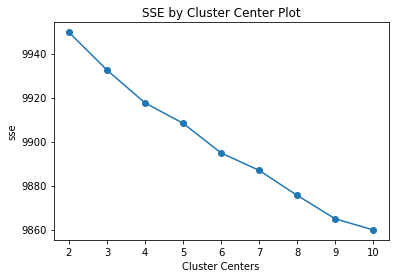

In [11]:
#Finding the optimal number of clusters for TFIDF vectorizer
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k,random_state=0, n_init=20).fit(data)
        sse.append(kmeans_model.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('sse')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(vecs1,10)

In [12]:
#In the graph it seems 5 is the optimal number of clusters
#So we conduct K means clustering with 5 clusters
k = 5
km1 = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km1.fit(vecs1)

KMeans(init='random', n_clusters=5, n_init=20, random_state=0, verbose=False)

In [13]:
#Creating a different variable for the clustering labels
df1 = data
df1['cluster_labels']= km1.labels_

In [14]:
#Cluster 0
df1[df1.cluster_labels==0]['title']

1       New form of ECT is as effective as older types...
2       Anti-inflammatory drugs do not improve cogniti...
3       Many men with low testosterone levels do not r...
5                                 Also in the May 27 JNCI
6       Childhood lead exposure associated with crimin...
                              ...                        
9992    Research pinpoints major drivers of tobacco ep...
9993    UT Southwestern leads national efforts around ...
9994    Mammography screening saves lives also in olde...
9995    New experimental blood test determines which p...
9998    Cannabis reduces OCD symptoms by half in the s...
Name: title, Length: 5774, dtype: object

In [15]:
#Cluster 1
df1[df1.cluster_labels==1]['title']

0       Prevalence of pre-cancerous masses in the colo...
8       Researchers uncover higher prevalence of perio...
12      Specialist nurses can play a key role in suppo...
20      Promising results in deep brain stimulation fo...
24      Making patients move requires the right exerci...
                              ...                        
9938    Genomic study of 6000 NCI-MATCH cancer patient...
9939    Catheter ablation linked to reduced risk of de...
9941    COVID-19 outcomes in patients with rare inborn...
9954    Most psoriasis patients taking immunosuppressa...
9988    Blood test could identify COVID-19 patients at...
Name: title, Length: 884, dtype: object

In [16]:
#Cluster 2
df1[df1.cluster_labels==2]['title'].head()

9     Cosmetic surgery procedures to exceed 55 milli...
13    Study of anti-CD20 therapy effective B cell de...
25    After ER visit, many patients in a fog, U-M st...
35    Case Western Reserve University study finds ca...
46    Study examines lung cancer among lifelong nons...
Name: title, dtype: object

In [17]:
#Cluster 3
df1[df1.cluster_labels==3]['title'].head()

14    Japanese diet rich in fish may hold secret to ...
48    Children's calorie expenditure, heart rate inc...
83    Diabetes medications in same class carry diffe...
98    Panic attacks linked to higher risk of heart a...
99    Panic attacks linked to higher risk of heart a...
Name: title, dtype: object

In [18]:
#Cluster 4
df1[df1.cluster_labels==4]['title'].head()

4     Much of the increased risk of death from smoki...
15    News from Cancer: Risk factors for deadly form...
28           Epilepsy linked to higher risk of drowning
31                          Cancer signatures uncovered
37    Former child soldiers of Nepal at increased ri...
Name: title, dtype: object

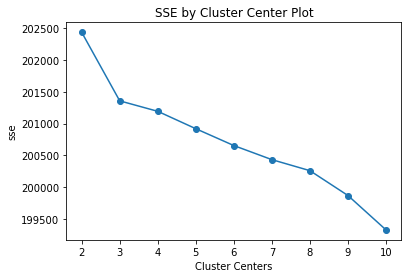

In [19]:
#Finding the optimal number of clusters for count vectorizer
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k,random_state=0, n_init=20).fit(data)
        sse.append(kmeans_model.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('sse')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(vecs,10)

In [20]:
#In the graph it seems 3 is the optimal number of clusters
#So we conduct K means clustering with 3 clusters
k = 3
km2 = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km2.fit(vecs)

KMeans(init='random', n_clusters=3, n_init=20, random_state=0, verbose=False)

In [21]:
#Creating a different variable for the clustering labels
df2 = data
df2['cluster_labels']= km2.labels_

In [22]:
#Cluster 0
df2[df2.cluster_labels==0]['title']

4       Much of the increased risk of death from smoki...
15      News from Cancer: Risk factors for deadly form...
28             Epilepsy linked to higher risk of drowning
37      Former child soldiers of Nepal at increased ri...
41      Reserve, National Guard at higher risk of alco...
                              ...                        
9915    Genetic analysis links obesity to higher rheum...
9939    Catheter ablation linked to reduced risk of de...
9963    Higher hypothetical disease risk linked with g...
9973    Caesarean birth, prolonged labour influence in...
9986    Study reveals risk factors for acute kidney in...
Name: title, Length: 1228, dtype: object

In [23]:
#Cluster 1
df2[df2.cluster_labels==1]['title']

1       New form of ECT is as effective as older types...
2       Anti-inflammatory drugs do not improve cogniti...
3       Many men with low testosterone levels do not r...
5                                 Also in the May 27 JNCI
6       Childhood lead exposure associated with crimin...
                              ...                        
9995    New experimental blood test determines which p...
9996    Cholesterol medications linked to lower cancer...
9997     The benefits of a prostate cancer screening tool
9998    Cannabis reduces OCD symptoms by half in the s...
9999    COVID-19 heightens urgency of advanced care pl...
Name: title, Length: 7750, dtype: object

In [24]:
#Cluster 2
df2[df2.cluster_labels==2]['title']

0       Prevalence of pre-cancerous masses in the colo...
8       Researchers uncover higher prevalence of perio...
12      Specialist nurses can play a key role in suppo...
20      Promising results in deep brain stimulation fo...
24      Making patients move requires the right exerci...
                              ...                        
9941    COVID-19 outcomes in patients with rare inborn...
9954    Most psoriasis patients taking immunosuppressa...
9960    Study finds room for improvement when hospital...
9974    Many Non-Hodgkin's Lymphoma patients can skip ...
9988    Blood test could identify COVID-19 patients at...
Name: title, Length: 1022, dtype: object

### LDA Modeling

In [25]:
#Conducting LDA modeling for TFIDF vectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
tf_feature_names = gram_tfidf_vectorizer.get_feature_names()
no_topics = 8

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(vecs1)

In [26]:
# Function to display the topic number, and the top keywords
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [27]:
#Performing LDA topic modeling for 8 different topics 
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
risk cancer study patients new linked disease heart women treatment
Topic 1:
covid 19 covid 19 brain injury patients study kidney injury cardiac acute
Topic 2:
osteoarthritis knee osteoarthritis metabolic storm knee metabolic syndrome environmental disease linked temperature alcoholic
Topic 3:
fatty liver smoke fatty liver disease secondhand secondhand smoke insulin resistance postmenopausal liver uc
Topic 4:
bipolar bipolar disorder eye disease eye patients diabetes game happiness kidney transplant disorder mark
Topic 5:
study health mental new children long air disease term long term
Topic 6:
neck head head neck review efficiency improves cancer dashboard improves digital dashboard dashboard case review cancer case
Topic 7:
cervical cervical cancer determines test determines cancers respond respond treatment new experimental determines pancreatic experimental blood live longer
